# A/B Test Analysis - Store Promotion Data

**Dataset downloaded from : https://www.kaggle.com/duonghoanvu1/marketing-campaign-fast-food**

## Data Review ##

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

In [4]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


**This dataset includes data on the market, location of the store, age of the store, 3 different promotions, the week and sales in thoudands.**

**Let's first look at sales volume by promotion type**

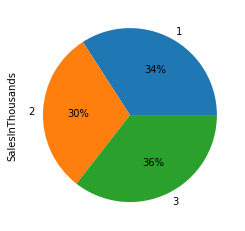

In [15]:
df.groupby('Promotion')['SalesInThousands'].sum().plot.pie(autopct='%1.0f%%')

**Promotion 3 has the biggest volume of sales (36%), however each of the 3 promotions roughly generated a third of all sales.**

**Let's now review the sales volume by promotion and market sizes**

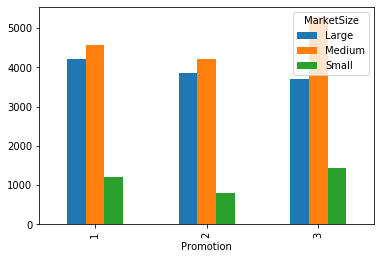

In [22]:
ax = df.groupby(['Promotion','MarketSize'])['SalesInThousands'].sum().unstack('MarketSize').plot(kind='bar')

**The medium market size is the majority in all 3 promotion and the other 2 market sizes seem evenly distributed across all 3 promotions**

**Let's now look at the average age of the stores and then the distribution of ages per promotion**

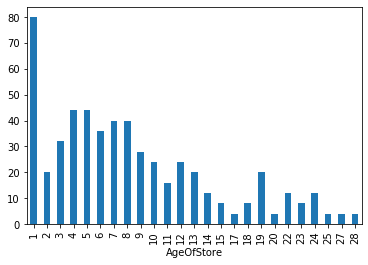

In [26]:
df.groupby('AgeOfStore')['MarketID'].count().plot(kind='bar')

**Many stores are 1 year old but the majority are > 1 year old.**

**Let's have a look at the age distribution by promotion, given the number of different ages, better to look at a table than a graph:**

In [33]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


**The average age of the stores for all 3 groups is between 8 and 9 years old.**

**Now that it has been confirmed that the 3 promotions were evenly assigned to markets of similar sizes and to stores of the same ages. This suggests that the sample groups were created correctly and the A/B Test results will be trustworthy.**

## Computing the T and P values##

**To compute the T value, it is first required to compute the mean, standard deviation and the number of samples:**

In [37]:
mean = df.groupby('Promotion')['SalesInThousands'].mean()
stds = df.groupby('Promotion')['SalesInThousands'].std()
ns = df.groupby('Promotion')['SalesInThousands'].count()

print(mean)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


**Let's first compare the Promotion 1 vs Promotion 2. The null hypothesis is that both promotion perform the same, the H1 hypothesis is that they dont:**

**H0 - Promotion 1 == Promotion 2**

**H1 - promotion 1 =! Promotion 2**

In [43]:
from scipy import stats

In [50]:
t1_2, p1_2 = stats.ttest_ind(
    df.loc[df['Promotion']==1,'SalesInThousands'].values,
    df.loc[df['Promotion']==2,'SalesInThousands'].values,
    equal_var=False
)
print(t1_2,p1_2)

6.42752867090748 4.2903687179871785e-10


**The P value is 4.2903687179871785e-10 which is < 0.05 which means we can reject the null hypothesis. As seen above, the promotion 1 has a sales volume mean of 58 and promotion 2 has a mean of 47.3. Therefore Promotion 1 performed significantly better than performance 2**

**Let's now compare Promotion 1 vs Promotion 3. The null hypothesis is that both promotion perform the same, the H1 hypothesis is that they dont:**

**H0 - Promotion 1 == Promotion 3**

**H1 - promotion 1 =! Promotion 3**

In [54]:
t1_3, p1_3 = stats.ttest_ind(
    df.loc[df['Promotion']==1,'SalesInThousands'].values,
    df.loc[df['Promotion']==3,'SalesInThousands'].values,
    equal_var=False
)
print(t1_3,p1_3)

1.5560224307758634 0.12059147742229478


**When comparing the sales volume mean, it seems Promotion 1 (58) performed better than Promotion 3 (55.3). But after running a t test, the P value is 0.12 and is > than 0.05 so the difference in performance is not significant.**